In [1]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scikitplot as skplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
pwd

'/Users/tarapongsrisongkram/OneDrive - Khon Kaen University (1)/Amylase inhibitor/Python'

In [3]:
df = pd.read_csv('df_clean_class.csv', index_col='Name_Short')
df.head(2)

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones,Bioactivity_class
Name_Short,,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2,active_both
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0,active_both


In [7]:
df['Bioactivity_class_number'] = df['Bioactivity_class'].map({'active_both': 3, 'active_glucosidase': 2, 'active_amylase': 1, 'inactive': 0})
df['Bioactivity_class_amylase_number'] = df['Bioactivity_class_amylase'].map({'active': 1, 'inactive': 0})
df['Bioactivity_class_glucosidase_number'] = df['Bioactivity_class_glucosidase'].map({'active': 1, 'inactive': 0})
df.head()

,Emax_amylase_2.75mcgml,Emax_glucosidase_0.67mcgml,IC50_amylase,IC50_glucosidase,Bioactivity_class_amylase,Bioactivity_class_glucosidase,Alkaloids,Antaquinones,Carotenoids,flavonoids,Reducing_sugars,Saponins,Tannins,Xanthones,Bioactivity_class,Bioactivity_class_number,Bioactivity_class_amylase_number,Bioactivity_class_glucosidase_number
Name_Short,,,,,,,,,,,,,,,,,,
G_cowa,99.6,51.1,0.13,0.63,active,active,0,0,0,0,0,2,2,2,active_both,3,1,1
P_debilis,99.5,50.0,0.14,0.72,active,active,3,0,0,5,3,0,0,0,active_both,3,1,1
P_evecta_leaf,93.9,52.0,0.14,0.57,active,active,0,0,0,3,0,3,2,0,active_both,3,1,1
P_evecta_Rhizome,35.8,50.6,NaN,0.63,inactive,active,3,0,0,5,3,0,0,5,active_glucosidase,2,0,1
E_cuneatum,86.5,39.6,0.17,NaN,active,inactive,3,0,0,2,0,3,3,0,active_amylase,1,1,0


In [5]:
indices = df.index

In [11]:
plant_df = df.copy()
x = plant_df[['Alkaloids', 'Antaquinones', 'Carotenoids', 'flavonoids', 'Reducing_sugars', 'Saponins', 'Tannins', 'Xanthones']]

## Y = Amylase

In [8]:
y = plant_df.Bioactivity_class_amylase_number.tolist()

In [9]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
# Shuffle the indices for the k-fold cross-validation
kf = KFold(n_splits=10, shuffle=False)

In [86]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

kNN  0.492 (0.231)
NB   0.592 (0.334)
SVC  0.592 (0.334)
RF   0.525 (0.274)
DT   0.583 (0.201)


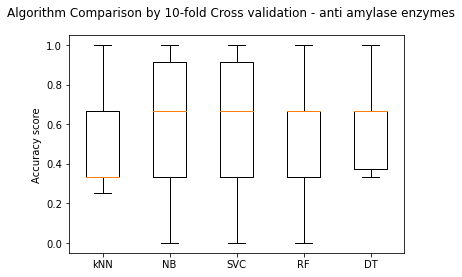

In [17]:
models = []
models.append(('kNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier(max_depth=5,random_state=42)))
models.append(('DT', DecisionTreeClassifier()))

results = []
names = []
for name, model in models:
    cvs = cross_val_score(model, x, y, cv=kf)
    results.append(cvs)
    names.append(name)
    print('{:4} {:.3f} ({:.3f})'.format(name, cvs.mean(), cvs.std()))
fig = plt.figure()
fig.suptitle('Algorithm Comparison by 10-fold Cross validation - anti amylase enzymes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy score')
plt.savefig('Amylase_CV_5 model.pdf', dpi=500, bbox_inches='tight')
plt.show()   

## RF amylase

In [90]:
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

CV_score = [0.66666667 0.33333333 0.33333333 0.         0.5        0.5
 1.         0.5        1.         0.5       ]
CV_mean = 0.5333333333333333
CV_sd = 0.28674417556808757
Y test = [1, 0, 0, 1, 1, 0, 0]
Y predict = [1 0 0 1 0 1 1]
accuracy score = 0.5714285714285714
accuracy score = 0.5714285714285714


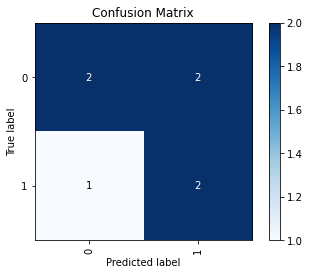

In [91]:
from sklearn.metrics import accuracy_score
scores=cross_val_score(model_RF, x_train, y_train, cv=kf)
avg_score = np.mean(scores)
sd_score = np.std(scores)
print(f'CV_score = {scores}')
print(f'CV_mean = {avg_score}')
print(f'CV_sd = {sd_score}')
y_pred = model_RF.predict(x_test)
y_pred
accuracy_score = accuracy_score(y_test, y_pred, normalize=True)
print(f'Y test = {y_test}')
print(f'Y predict = {y_pred}')
print(f'accuracy score = {accuracy_score}')
print(f'accuracy score = {accuracy_score}')
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.xticks(rotation=90)
plt.show()

In [60]:
y_pred

array([1, 0, 0, 1, 0, 1, 1])

Confusion matrix

 [[4 2]
 [0 1]]


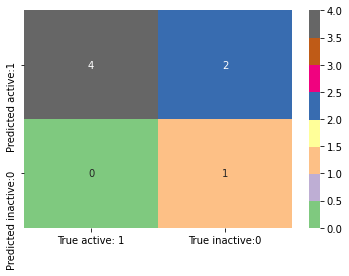

In [79]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['True active: 1', 'True inactive:0'], 
                                 index=['Predicted active:1', 'Predicted inactive:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Accent')
plt.savefig('Confusion_matrix_amylase.pdf', dpi=500, bbox_inches='tight')
plt.xlabel('')
plt.show()

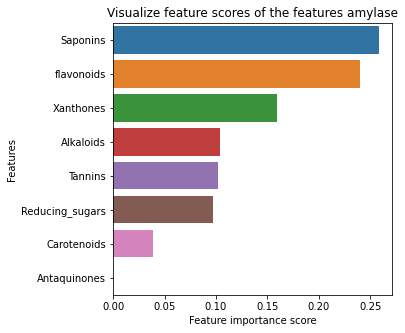

In [70]:
feature_scores = pd.Series(model_RF.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores
f, ax = plt.subplots(figsize=(5, 5))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features amylase")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.savefig('Feature_amylase_RF.pdf', dpi=500, bbox_inches='tight')
plt.show()

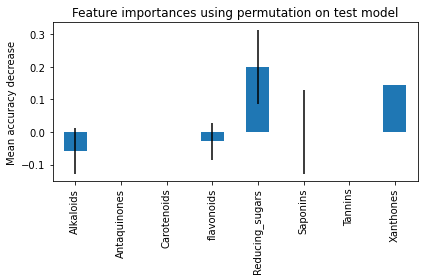

In [63]:
#Train features
from sklearn.inspection import permutation_importance
result = permutation_importance(model_RF, x_test, y_test, random_state=42)
feature_names = x_test.columns

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on test model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Text(0.5, 0, 'Permutation Feature Importances')

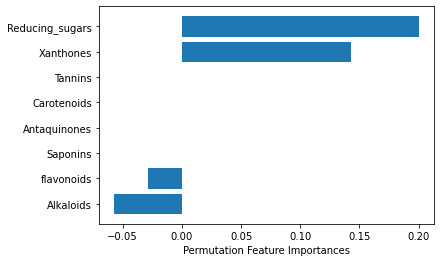

In [64]:
sorted_idx = result.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Feature Importances")

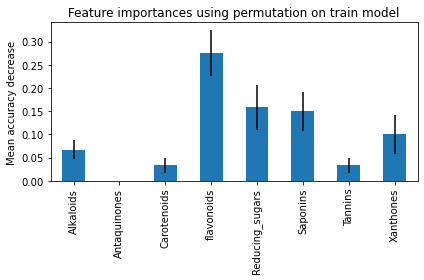

In [65]:
#Train features
from sklearn.inspection import permutation_importance
result = permutation_importance(model_RF, x_train, y_train, random_state=42)
feature_names = x_train.columns

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on train model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Text(0.5, 0, 'Permutation Feature Importances - Train set')

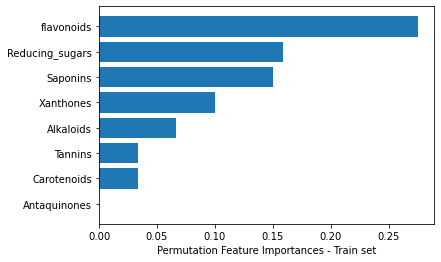

In [66]:
sorted_idx = result.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Feature Importances - Train set")

In [67]:
import shap
explainer = shap.TreeExplainer(model_RF)
shap_values = explainer.shap_values(x_train)

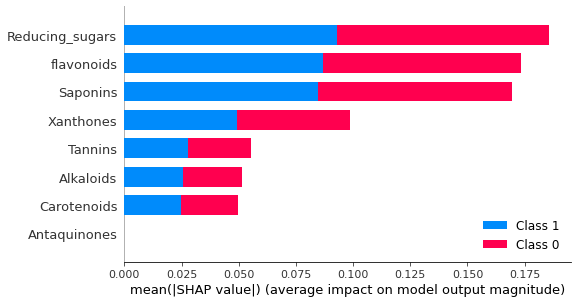

In [68]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

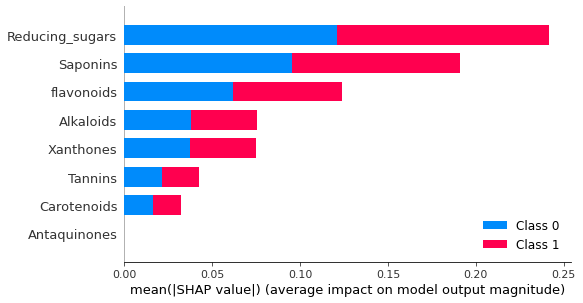

In [69]:
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")

# Glucosidase

In [71]:
y = plant_df.Bioactivity_class_glucosidase_number.tolist()
y

[1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [72]:
x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(fingerprint_to_model, y, indices, test_size=0.2, random_state=42)
splits = [x_train, x_test, y_train, y_test]
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
# Shuffle the indices for the k-fold cross-validation
kf = KFold(n_splits=10, shuffle=False)
#CHECK_OUTPUT
print("Training data size:", len(x_train))
print("Test data size:", len(x_test))

Training data size: 24
Test data size: 7


In [73]:
models = []
models.append(('kNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier(n_estimators=100,random_state=42)))
models.append(('DT', DecisionTreeClassifier()))

results = []
names = []
for name, model in models:
    cvs = cross_val_score(model, x_train, y_train, cv=kf)
    results.append(cvs)
    names.append(name)
    print('{:4} {:.3f} ({:.3f})'.format(name, cvs.mean(), cvs.std()))
    

kNN  0.767 (0.249)
NB   0.317 (0.320)
SVC  0.650 (0.252)
RF   0.817 (0.241)
DT   0.883 (0.183)


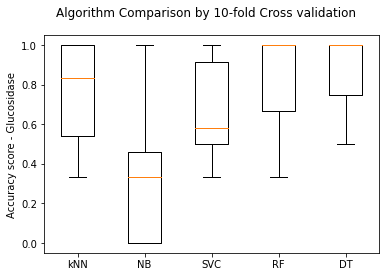

In [74]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison by 10-fold Cross validation')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy score - Glucosidase')
plt.show()

CV_score = [0.33333333 1.         0.66666667 0.66666667 1.         1.
 1.         1.         1.         0.5       ]
CV_mean = 0.8166666666666667
CV_sd = 0.24094720491334937
accuracy score = 0.7142857142857143


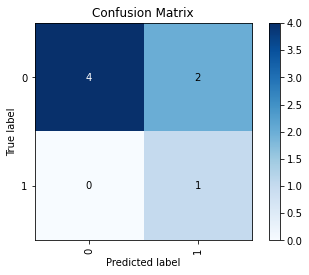

In [75]:

model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(x_train, y_train)

from sklearn.metrics import accuracy_score
scores=cross_val_score(model_RF, x_train, y_train, cv=kf)
avg_score = np.mean(scores)
sd_score = np.std(scores)
print(f'CV_score = {scores}')
print(f'CV_mean = {avg_score}')
print(f'CV_sd = {sd_score}')
y_pred = model_RF.predict(x_test)
y_pred
accuracy_score = accuracy_score(y_test, y_pred, normalize=True)
print(f'accuracy score = {accuracy_score}')
skplot.metrics.plot_confusion_matrix(y_test, y_pred)
plt.xticks(rotation=90)
plt.show()

In [76]:
feature_scores = pd.Series(model_RF.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

Saponins           0.260098
flavonoids         0.224157
Alkaloids          0.165346
Tannins            0.150152
Reducing_sugars    0.123193
Xanthones          0.074695
Carotenoids        0.002359
Antaquinones       0.000000
dtype: float64

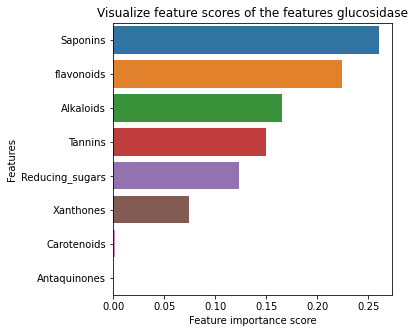

In [77]:
f, ax = plt.subplots(figsize=(5, 5))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features glucosidase")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.savefig('Feature_glucosidase_RF.pdf', dpi=500, bbox_inches='tight')
plt.show()

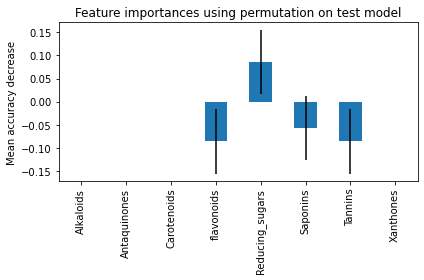

In [41]:
#Train features
from sklearn.inspection import permutation_importance
result = permutation_importance(model_RF, x_test, y_test, random_state=42)
feature_names = x_test.columns

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on test model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Text(0.5, 0, 'Permutation Feature Importances')

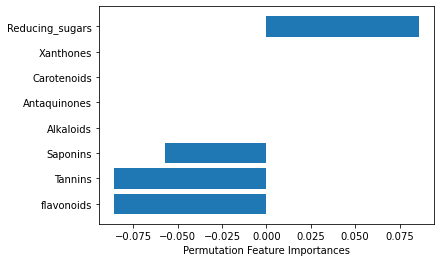

In [42]:
sorted_idx = result.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Feature Importances")

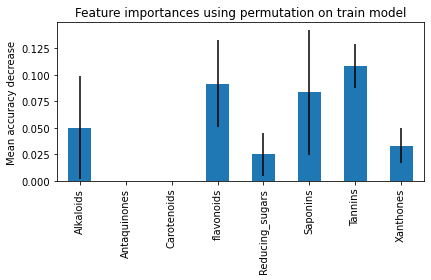

In [43]:
#Train features
from sklearn.inspection import permutation_importance
result = permutation_importance(model_RF, x_train, y_train, random_state=42)
feature_names = x_train.columns

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on train model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Text(0.5, 0, 'Permutation Feature Importances')

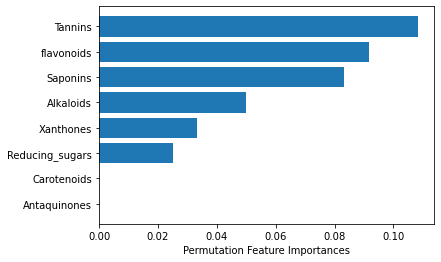

In [44]:
sorted_idx = result.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Feature Importances")

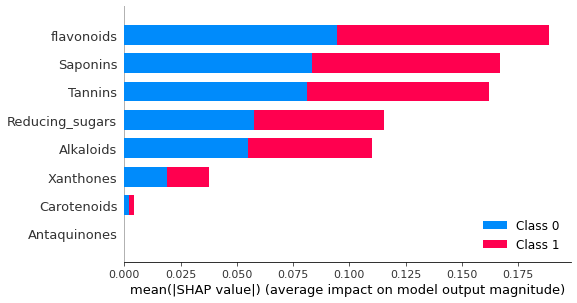

In [45]:
import shap
explainer = shap.TreeExplainer(model_RF)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

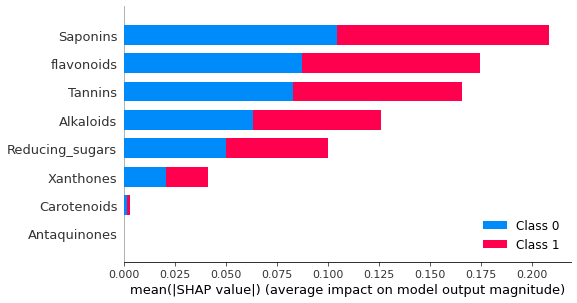

In [46]:
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4 2]
 [0 1]]


Confusion matrix

 [[4 2]
 [0 1]]


<AxesSubplot:>

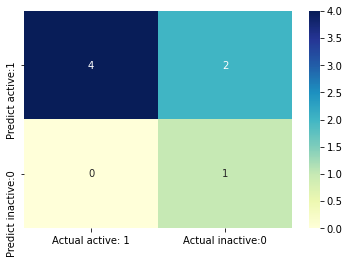

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual active: 1', 'Actual inactive:0'], 
                                 index=['Predict active:1', 'Predict inactive:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [123]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.33      1.00      0.50         1

    accuracy                           0.71         7
   macro avg       0.67      0.83      0.65         7
weighted avg       0.90      0.71      0.76         7

